In [3]:
from astromodels.astromodels import metropolis_sampler
import numpy as np
from astropy.modeling.models import Sersic1D, Sersic2D
from astropy.modeling.core import Fittable1DModel, Parameter
import matplotlib.pyplot as plt
from astropy.visualization import hist
from scipy.stats import rv_continuous
import timeit
from scipy.integrate import cumtrapz

In [5]:
class Sersic1D(Fittable1DModel):
    amplitude = Parameter(default=1)
    r_eff = Parameter(default=1)
    n = Parameter(default=4)
    _gammaincinv = None

    @classmethod
    def evaluate(cls, r, amplitude, r_eff, n):
        """One dimensional Sersic profile function."""

        if cls._gammaincinv is None:
            try:
                from scipy.special import gammaincinv
                cls._gammaincinv = gammaincinv
            except ValueError:
                raise ImportError('Sersic1D model requires scipy > 0.11.')

        return (amplitude * np.exp(
            -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)))
    
    def _pdf(self, r):
        s = Sersic1D(amplitude=self.amplitude, r_eff=self.r_eff, n=self.n)
        return s(r)

sersic = Sersic1D(amplitude=1, r_eff=5, n=4)

In [9]:
N = int(1e5)

start_time = timeit.default_timer()
samples = metropolis_sampler(sersic, N)
print("TIME metropolis: ", timeit.default_timer() - start_time)

print(samples.size)


<ipython-input-5-0cf490e502e1>:19: RuntimeWarning: invalid value encountered in power
  -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)))


TIME metropolis:  11.78058847799548
100000


[]

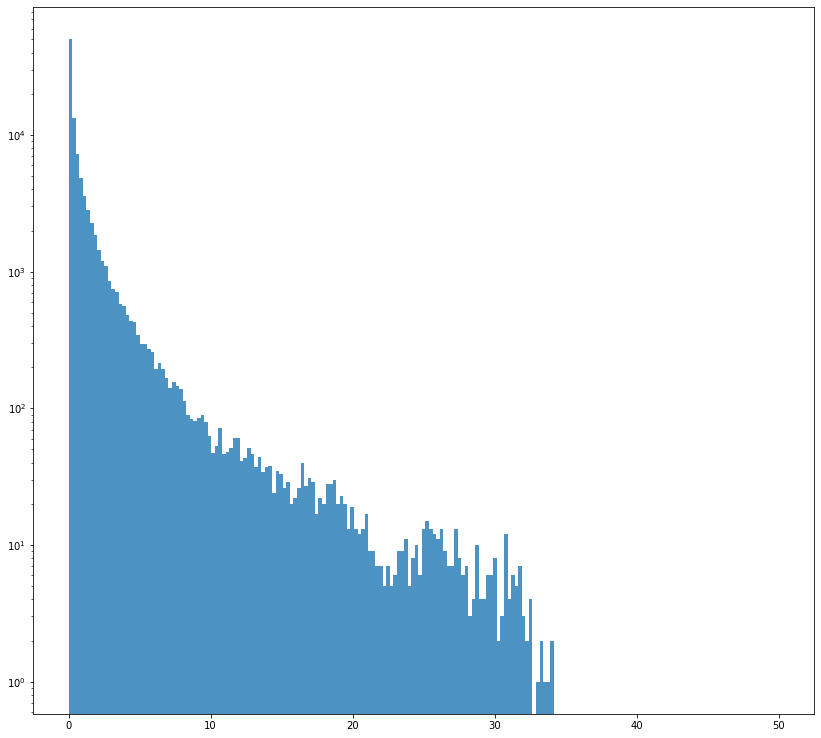

In [10]:
fig = plt.figure(figsize=(14,13))

bins = np.linspace(0,50, 200)
hist(samples, bins=bins, alpha=0.8)
plt.semilogy()

In [11]:
def gauss_pdf(x):
    return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)


start_time = timeit.default_timer()
N = 1000000
samples = metropolis_sampler(gauss_pdf, N)

print("TIME metropolis:", timeit.default_timer() - start_time)



TIME metropolis: 6.6822401030076435


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-4.95986835, -4.95478714, -4.94970592, ...,  5.19239441,
         5.19747562,  5.20255683]),
 <BarContainer object of 2000 artists>)

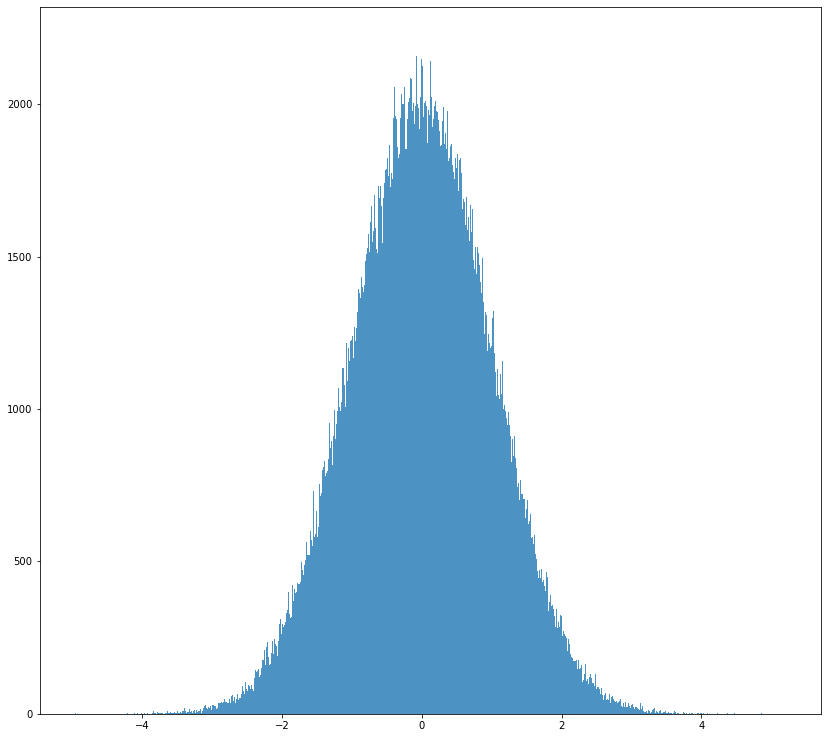

In [12]:
fig = plt.figure(figsize=(14,13))
hist(samples, bins=2000, alpha=0.8)


In [13]:
def uniform_proposal(x, delta=2.0, size):
    return np.random.uniform(x - delta, x + delta, size=size)


def metro(pdf, nsamples, proposal=uniform_proposal):
    array = np.linspace(0,nsamples,1)
    
    trial = uniform_proposal()
    
    
    

0.39364394100717826

In [15]:
np.random.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than or equal to high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a s